# Run toy EDM 

In [1]:
# Preamble and imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load custom style
plt.style.use('../src/utils/edm.mplstyle')

# Add the src subdirectories to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root / "src" / "core"))
sys.path.append(str(project_root / "src" / "utils"))

# Import internal modules
from simulate import Simulation
from plotting import Plotter

print("Muon EDM toy simulation framework")

print("=" * 40)
print(f"Project root: {project_root}")

# Create the spin precession simulator
simulation = Simulation()

# Create plotter
plotter = Plotter()

Muon EDM toy simulation framework
Project root: /Users/sgrant/gm2/toy-edm

--- Configuration ---
Simulation:
  physics:
    PhysicsParameters:
      c: 299792458
      e: 1.602176634e-19
      q: 1.0
      h: 6.62607015e-34
      hbar: 1.0545718176461565e-34
      m_mu: 105.6583745
      tau_mu: 2.197e-06
  muon:
    MuonParameters:
      physics:
        PhysicsParameters:
          c: 299792458
          e: 1.602176634e-19
          q: 1.0
          h: 6.62607015e-34
          hbar: 1.0545718176461565e-34
          m_mu: 105.6583745
          tau_mu: 2.197e-06
      a_mu: 0.001165920715
      a_mu_uncertainty: 1.45e-10
      a_mu_relative_uncertainty: 1.24e-07
      magic_momentum: 3.094
  precession:
    PrecessionParameters:
      physics:
        PhysicsParameters:
          c: 299792458
          e: 1.602176634e-19
          q: 1.0
          h: 6.62607015e-34
          hbar: 1.0545718176461565e-34
          m_mu: 105.6583745
          tau_mu: 2.197e-06
      muons:
        MuonPa

In [12]:
print("sanity check")
print(f"simulation.omega_a = {(simulation.omega_a/(2*np.pi))*1e-6:.3f} MHz")
print(f"simulation.omega_c = {(simulation.omega_c):.3f} MHz")
print(f"simulation.omega_c = {(simulation.omega_c/(2*np.pi))*1e-6:.3f} MHz")

sanity check
simulation.omega_a = 0.229 MHz
simulation.omega_c = 42090778.978 MHz
simulation.omega_c = 6.699 MHz



=== Running: No tilt ===

=== Running: EDM ($10^{-20}$ e$\cdot$cm) ===

=== Running: $B_{r,n=0}$ (100 ppm) ===

=== Running: $B_{z,n=0}$ (100 ppm) ===

=== Running: $B_{z,n=1}$ (100 ppm) ===
	Wrote ../img/spin_3d_overlay.png


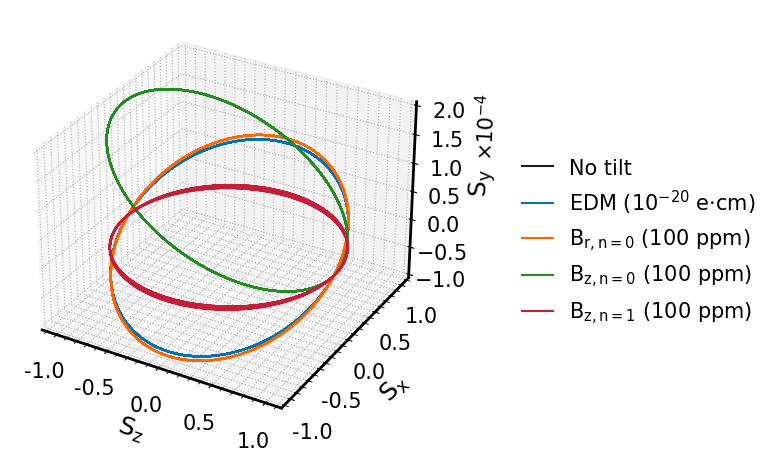

	Wrote ../img/sy_modulo_overlay.png


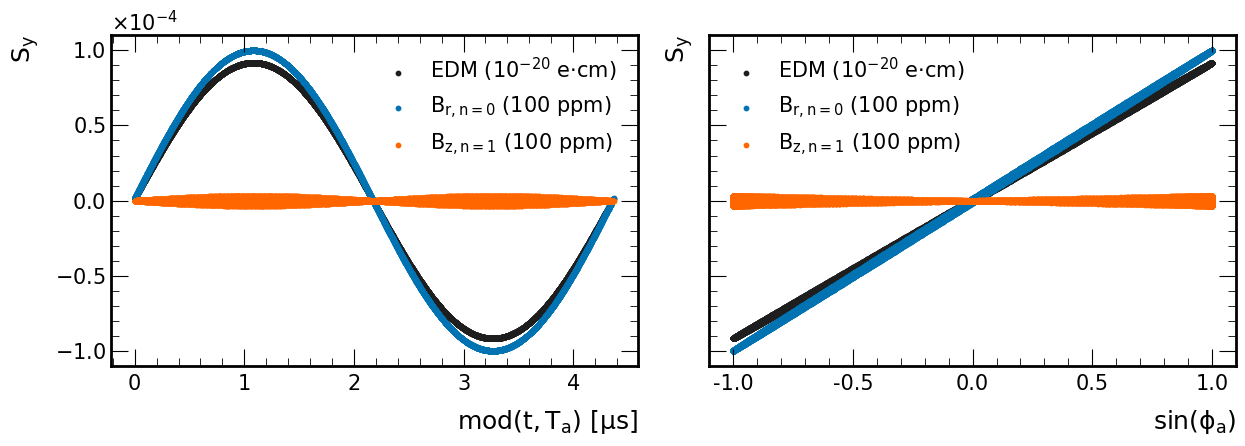

In [3]:
# Configuration dictionary for EDM simulation comparisons

time_steps = int(5e3)
configs = {
    "No tilt": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 0.0} # Background field strengths in ppm
    },
    r"EDM ($10^{-20}$ e$\cdot$cm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 1e-20,       # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 0.0} # Background field strengths in ppm
    },
    "$B_{r,n=0}$ (100 ppm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 100.0, "Bz_n0": 0.0, "Bz_n1": 0.0}  # Background field strengths in ppm
    },
    "$B_{z,n=0}$ (100 ppm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 100.0, "Bz_n1": 0.0}  # Background field strengths in ppm
    },
    "$B_{z,n=1}$ (100 ppm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 100.0}  # Background field strengths in ppm
    },
}

# Run all configurations
results = {}
for label, config in configs.items():
    print(f"\n=== Running: {label} ===")
    results[label] = simulation.run(**config)

plotter.spin_3d_overlay(results, out_path='../img/spin_3d_overlay.png')

exclude = {"No tilt", "$B_{z,n=0}$ (100 ppm)"}
filtered_results = {key: value for key, value in results.items() if key not in exclude}
plotter.sy_modulo_overlay(filtered_results, out_path='../img/sy_modulo_overlay.png')
# plotter.spin_3d_grid(results, out_path='../img/spin_3d_grid.png')

## No EDM, no backgrounds

/Users/sgrant/gm2/toy-edm/src/utils/plotting.py:401: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.1, 1.0)) # Hack to extend the frame


	Wrote ../img/no_edm_no_bkg/plt_spin_3d.png


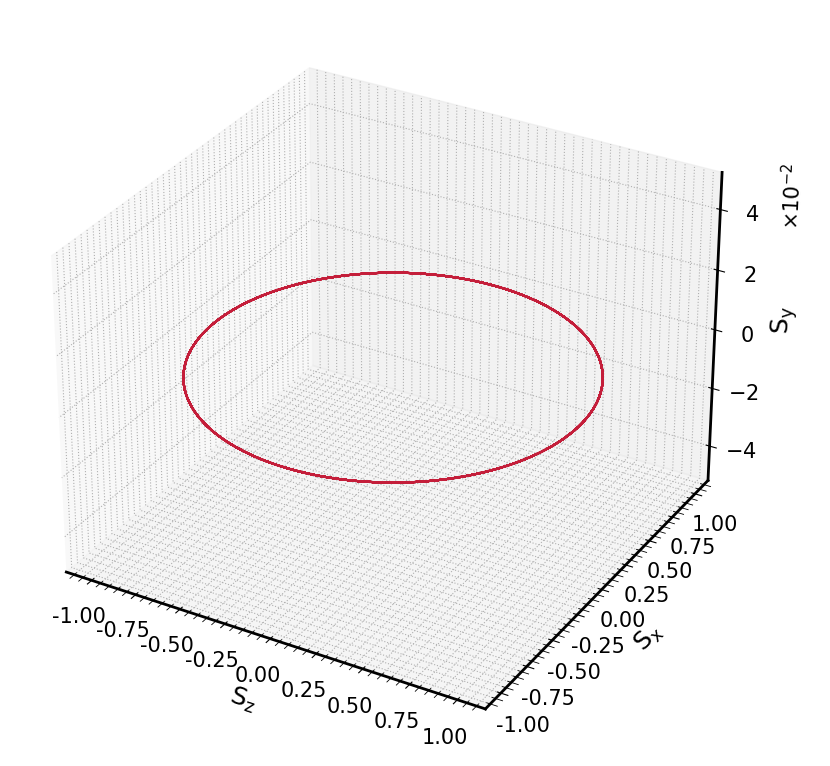

	Wrote ../img/no_edm_no_bkg/gr_1x2_wiggle_modulo.png


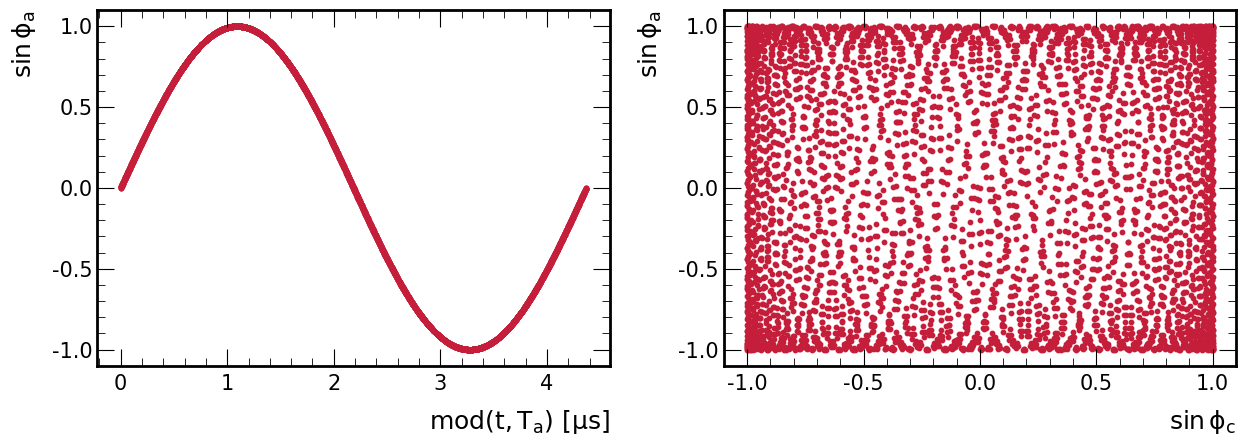

	Wrote ../img/no_edm_no_bkg/gr_sy_modulo.png


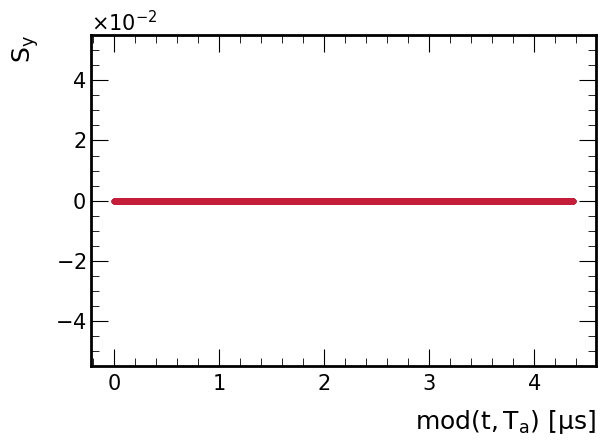

	Wrote ../img/no_edm_no_bkg/gr_3x2_spin_phase_summary.png


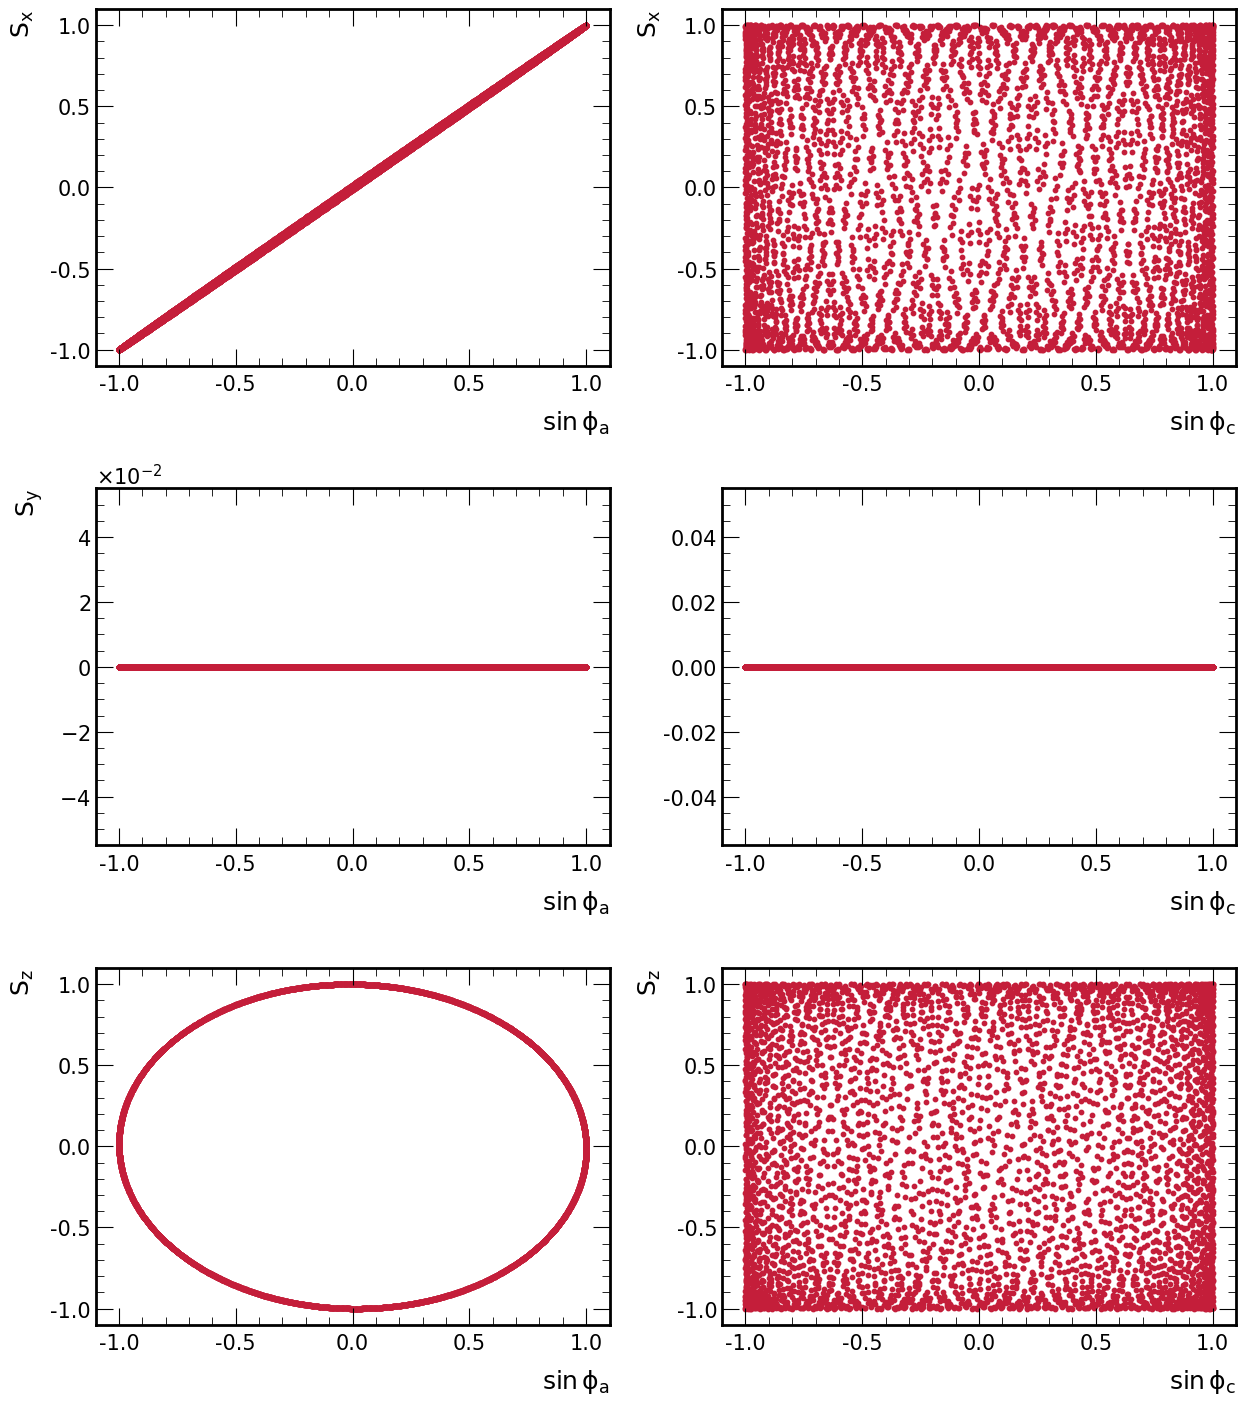

In [4]:

# Run the simulation
config = {
    'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 0,       # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="no_edm_no_bkg"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')


## Large EDM, no backgrounds 

	Wrote ../img/large_edm_no_bkg/plt_spin_3d.png


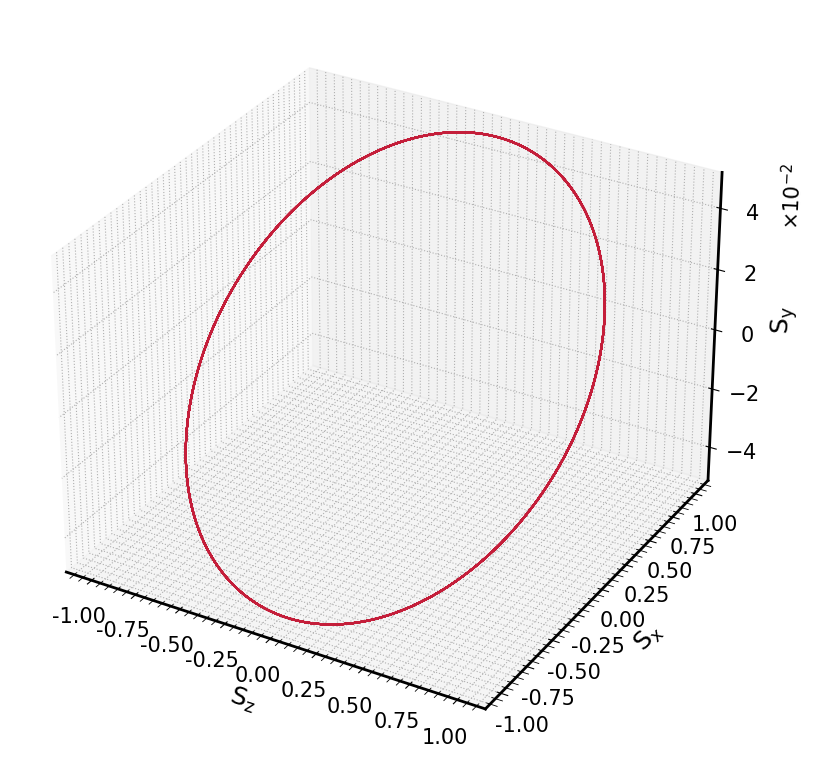

	Wrote ../img/large_edm_no_bkg/gr_1x2_wiggle_modulo.png


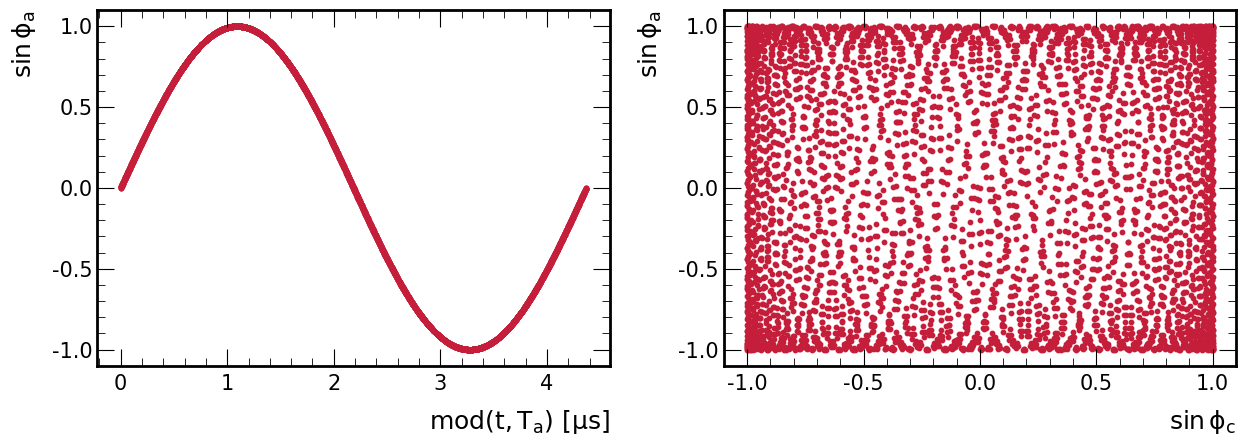

	Wrote ../img/large_edm_no_bkg/gr_sy_modulo.png


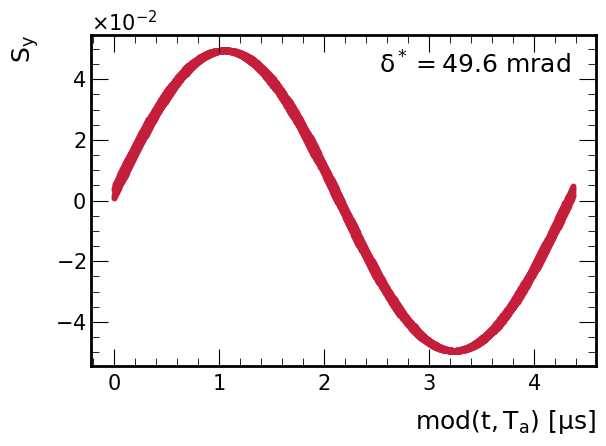

	Wrote ../img/large_edm_no_bkg/gr_3x2_spin_phase_summary.png


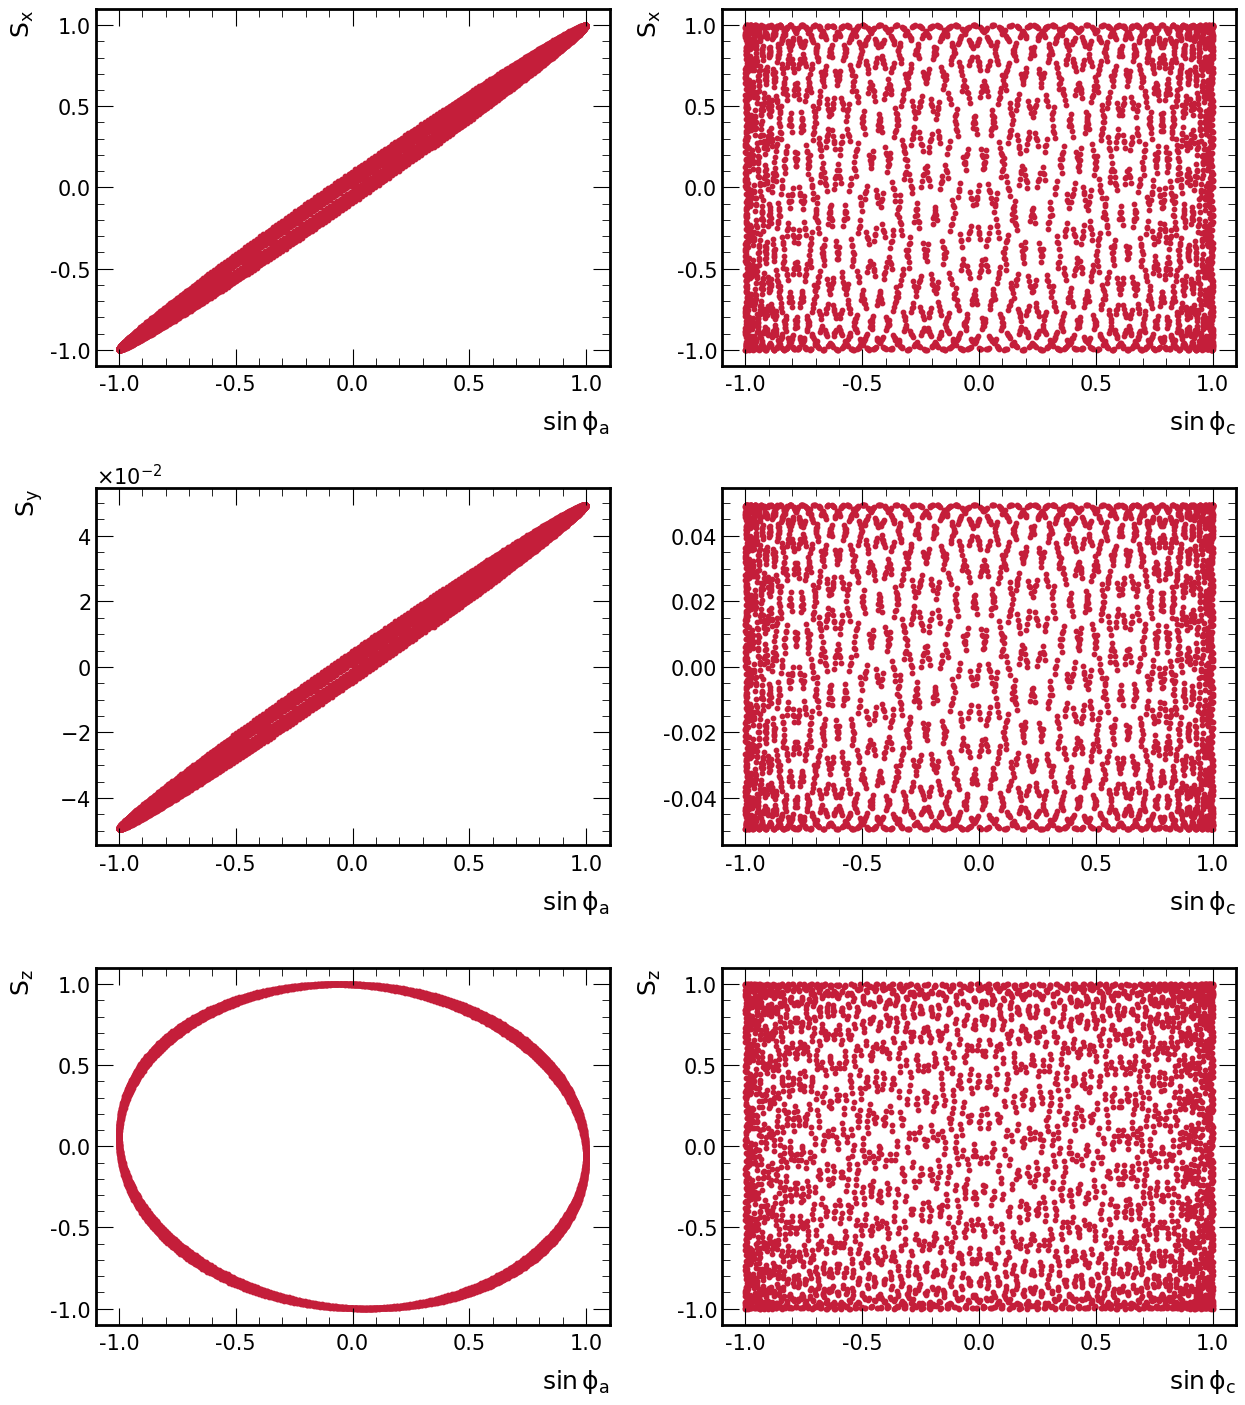

In [5]:

# Run the simulation
config = {
    'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 5.4e-18,       # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
# Make plots 

dir="large_edm_no_bkg"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')


In [6]:
results["edm_tilt_lab"]

np.float64(0.001691611554770758)

## Small EDM, no backgrounds 

	Wrote ../img/small_edm_no_bkg/plt_spin_3d.png


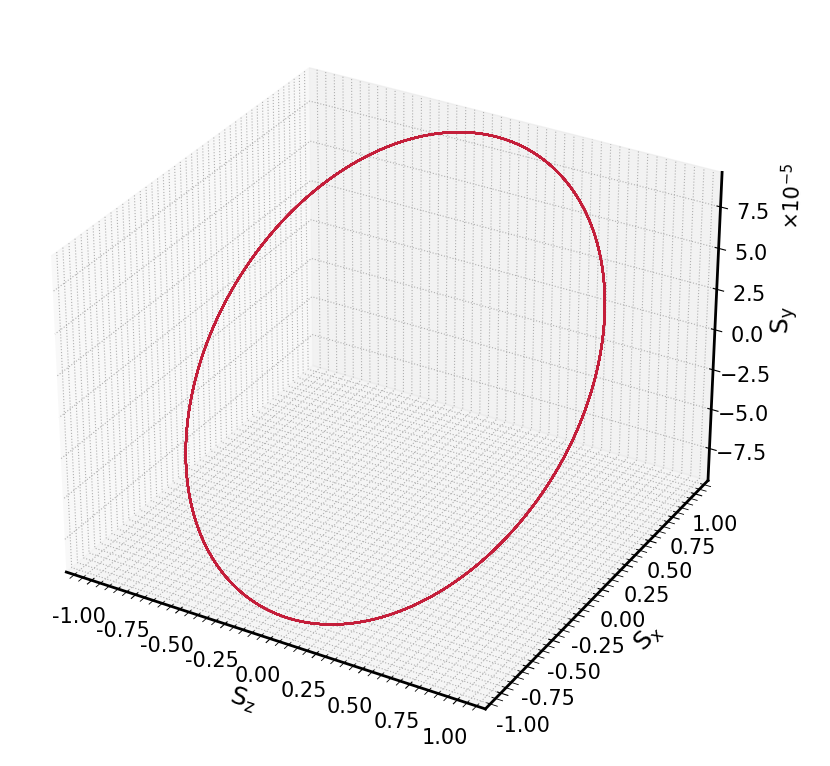

	Wrote ../img/small_edm_no_bkg/gr_1x2_wiggle_modulo.png


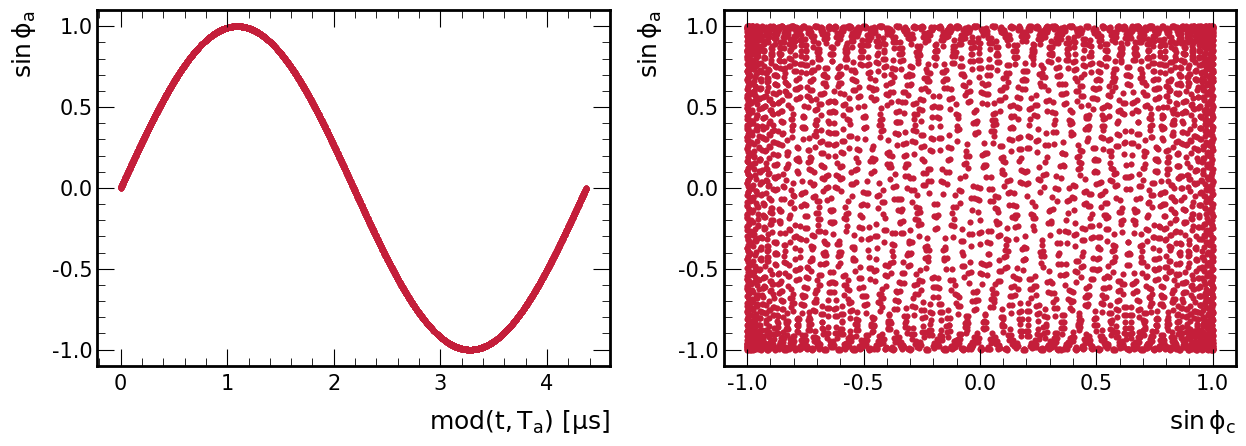

	Wrote ../img/small_edm_no_bkg/gr_sy_modulo.png


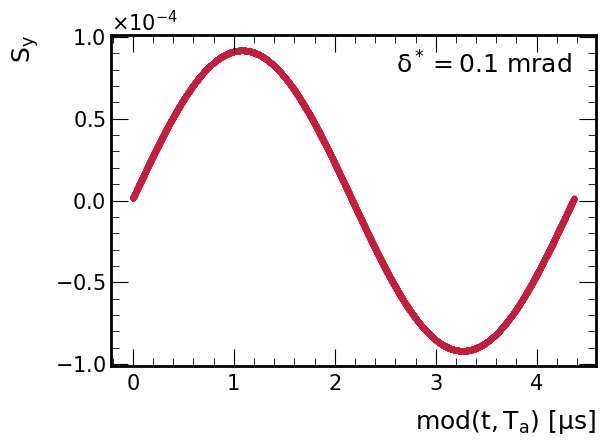

	Wrote ../img/small_edm_no_bkg/gr_3x2_spin_phase_summary.png


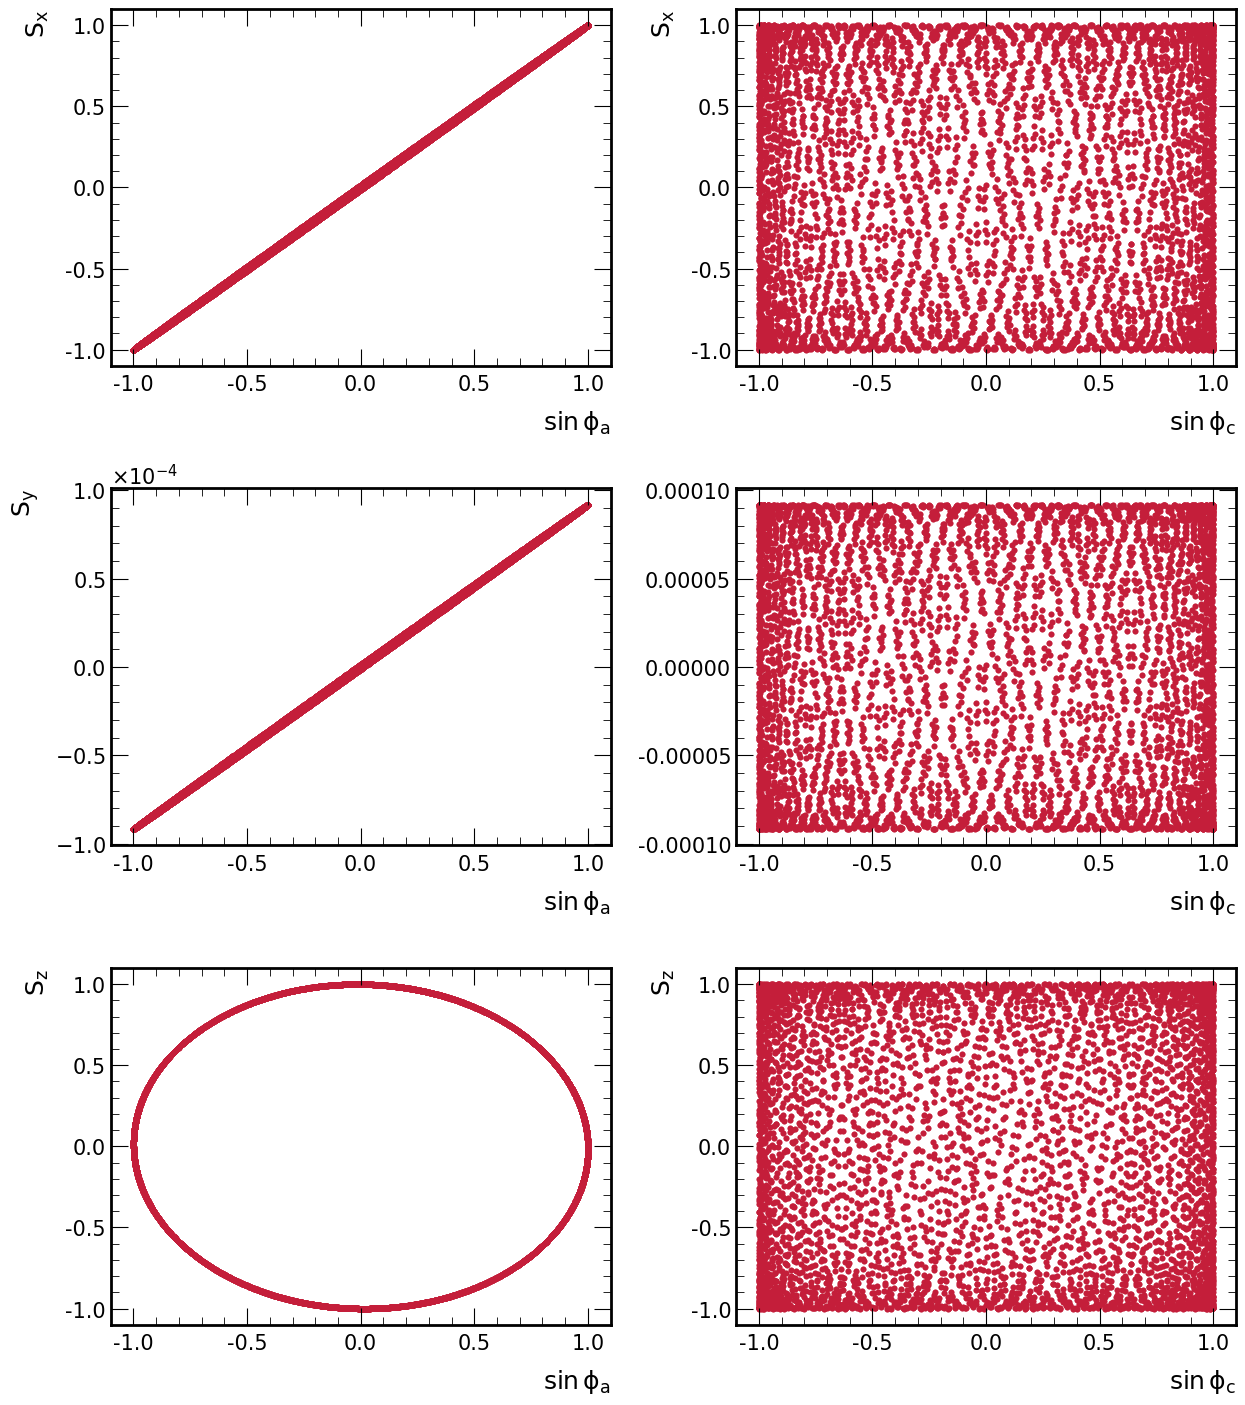

In [7]:

# Run the simulation
config = {
    'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 1e-20,       # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="small_edm_no_bkg"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')

## No EDM, Br (N=0) at 1 ppm

	Wrote ../img/no_edm_Br_n0_1ppm/plt_spin_3d.png


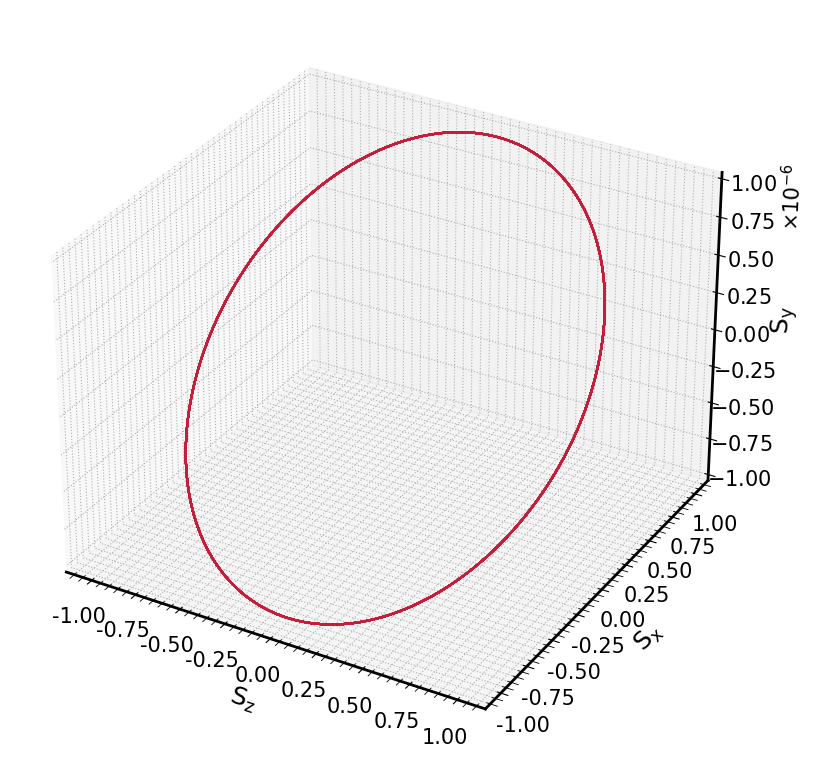

	Wrote ../img/no_edm_Br_n0_1ppm/gr_1x2_wiggle_modulo.png


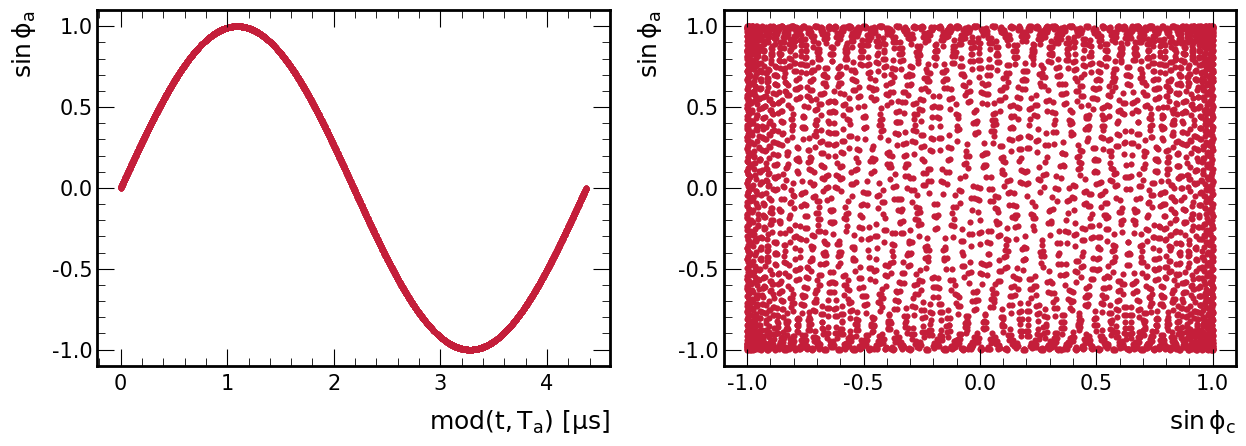

	Wrote ../img/no_edm_Br_n0_1ppm/gr_sy_modulo.png


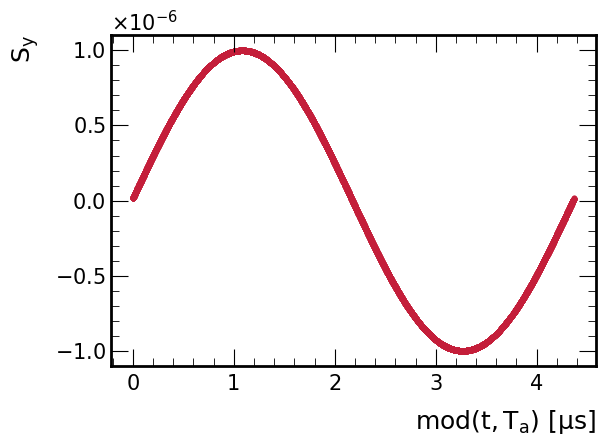

	Wrote ../img/no_edm_Br_n0_1ppm/gr_3x2_spin_phase_summary.png


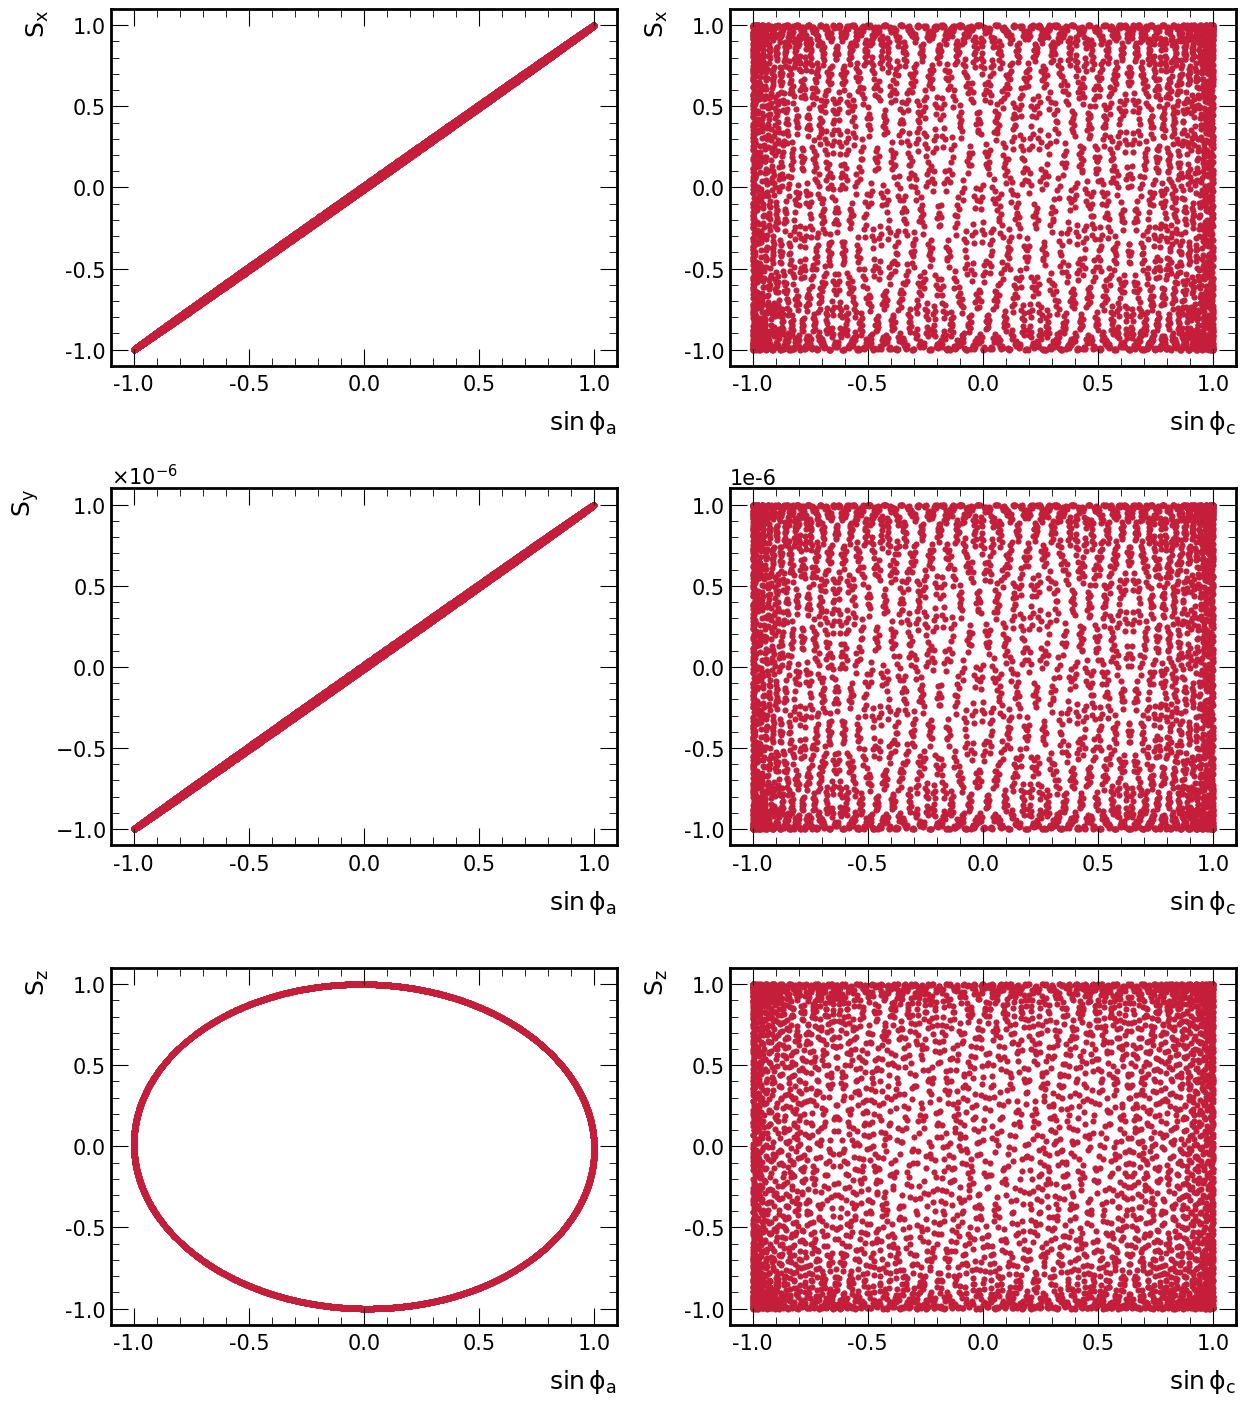

In [8]:

# Run the simulation
config = {
    'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 0,       # EDM magnitude in ecm 
    'backgrounds': {"Br_n0": 1.0, "Bz_n0": 0.0, "Bz_n1": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="no_edm_Br_n0_1ppm"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')

## No EDM, Bz (N=0) at 1 ppm 

	Wrote ../img/small_edm_Bz_n0_1ppm/plt_spin_3d.png


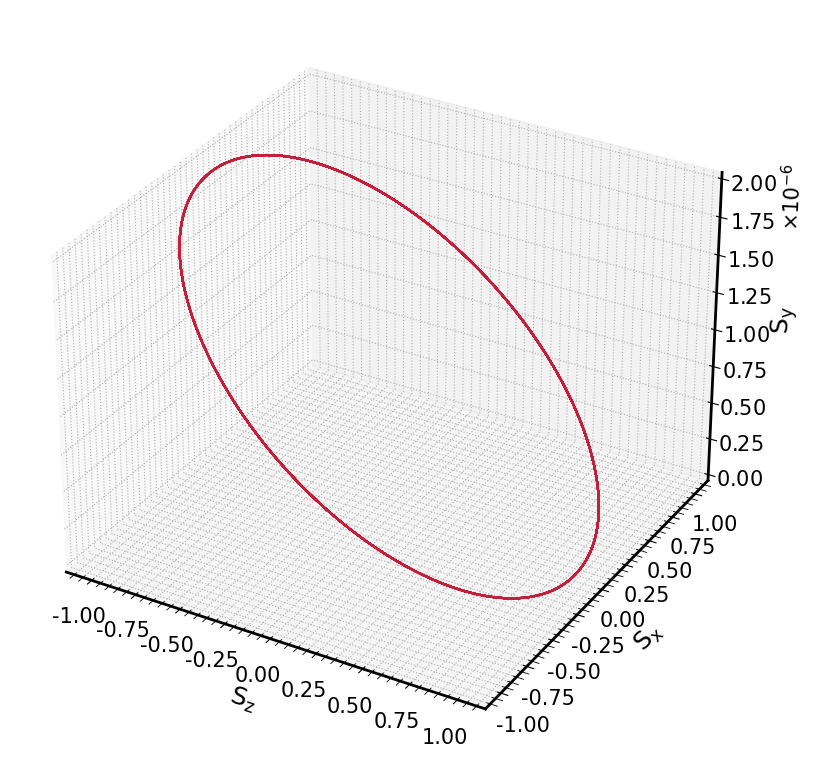

	Wrote ../img/small_edm_Bz_n0_1ppm/gr_1x2_wiggle_modulo.png


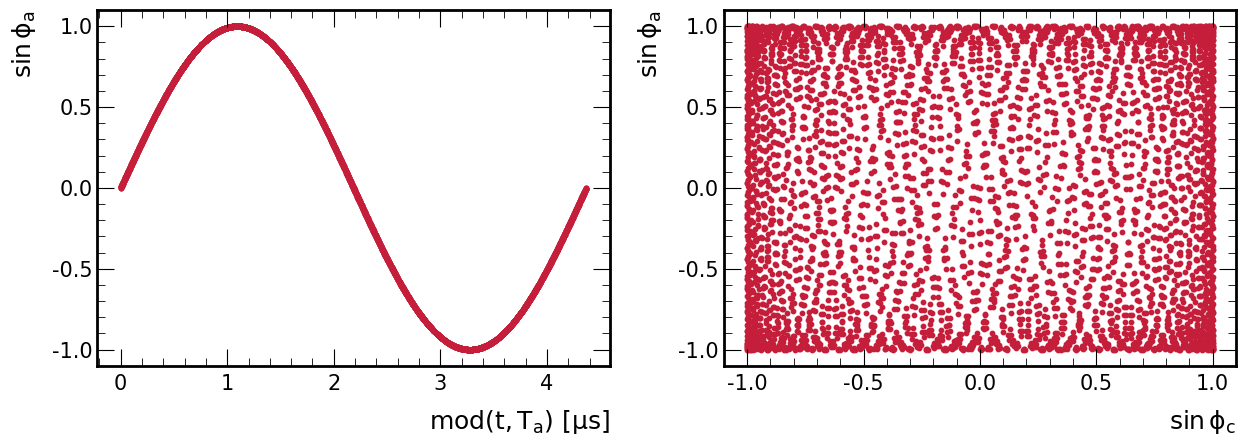

	Wrote ../img/small_edm_Bz_n0_1ppm/gr_sy_modulo.png


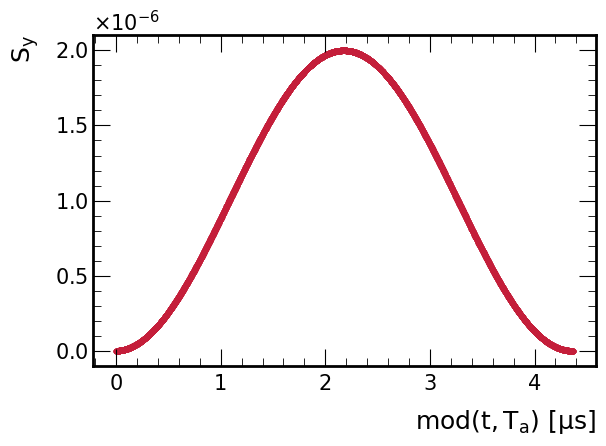

	Wrote ../img/small_edm_Bz_n0_1ppm/gr_3x2_spin_phase_summary.png


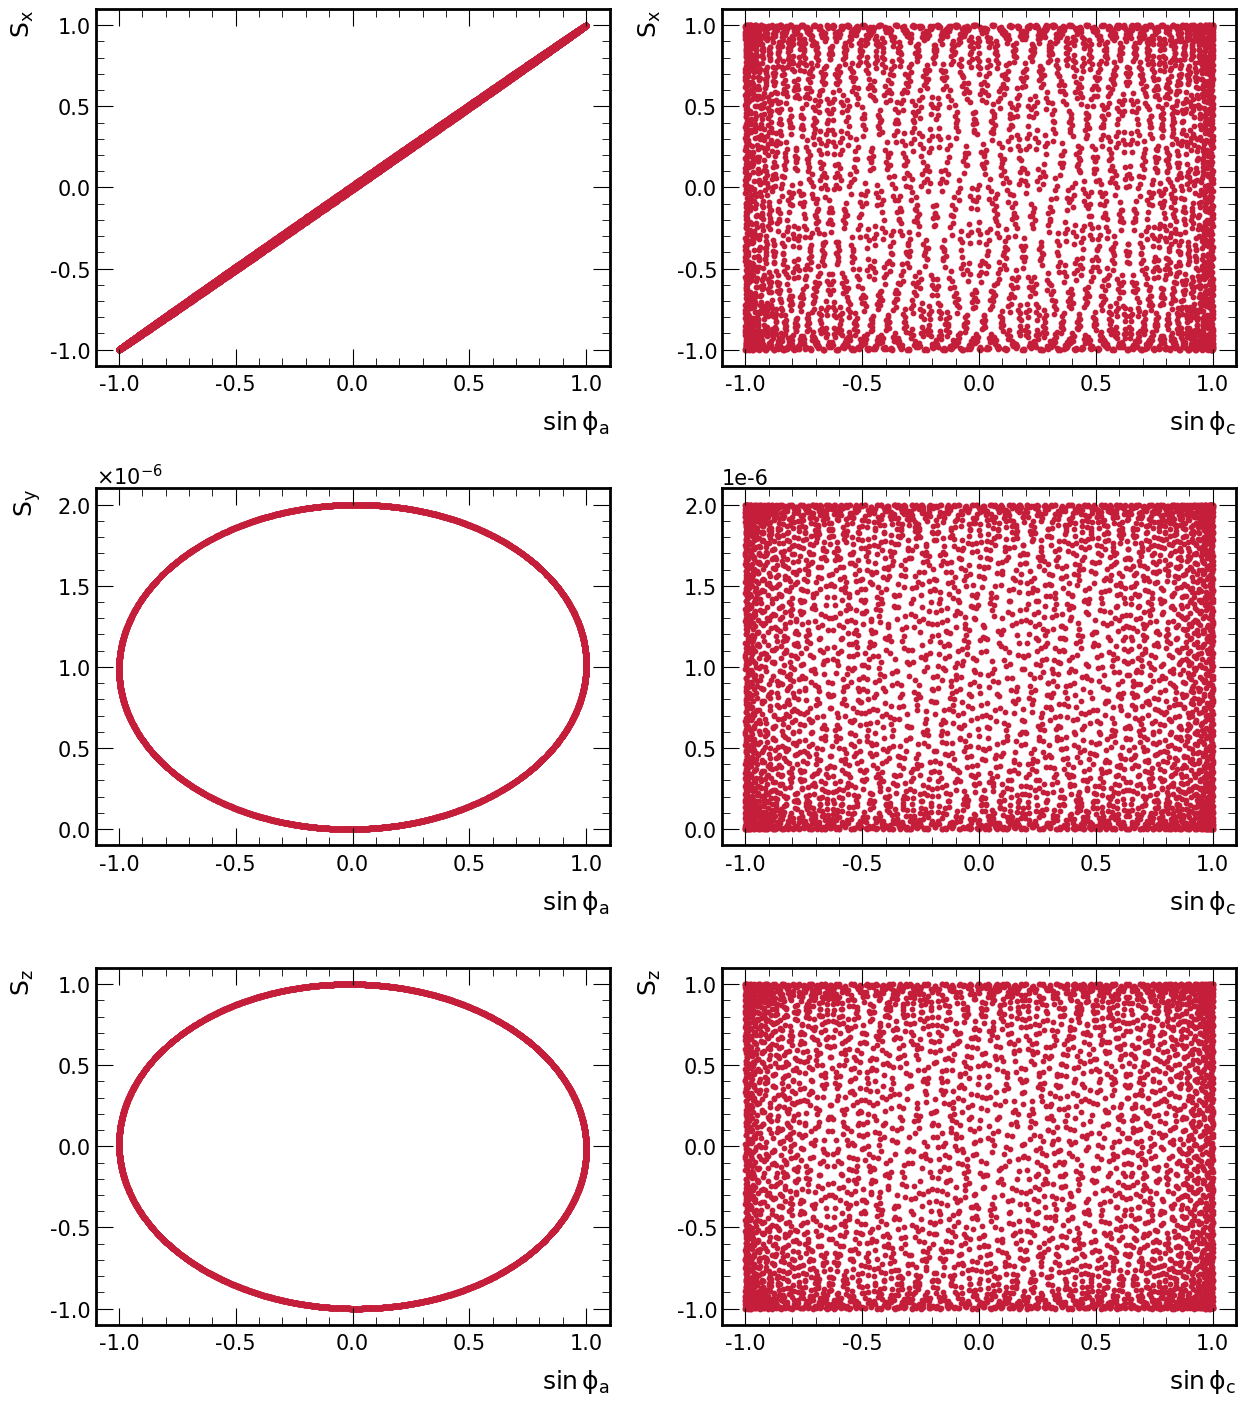

In [9]:

# Run the simulation
config = {
    'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 0,           # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n0": 1.0, "Br_n1": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="small_edm_Bz_n0_1ppm"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')

## No EDM, Bz (N=1) at 1 ppm 

	Wrote ../img/small_edm_Bz_n1_1ppm/plt_spin_3d.png


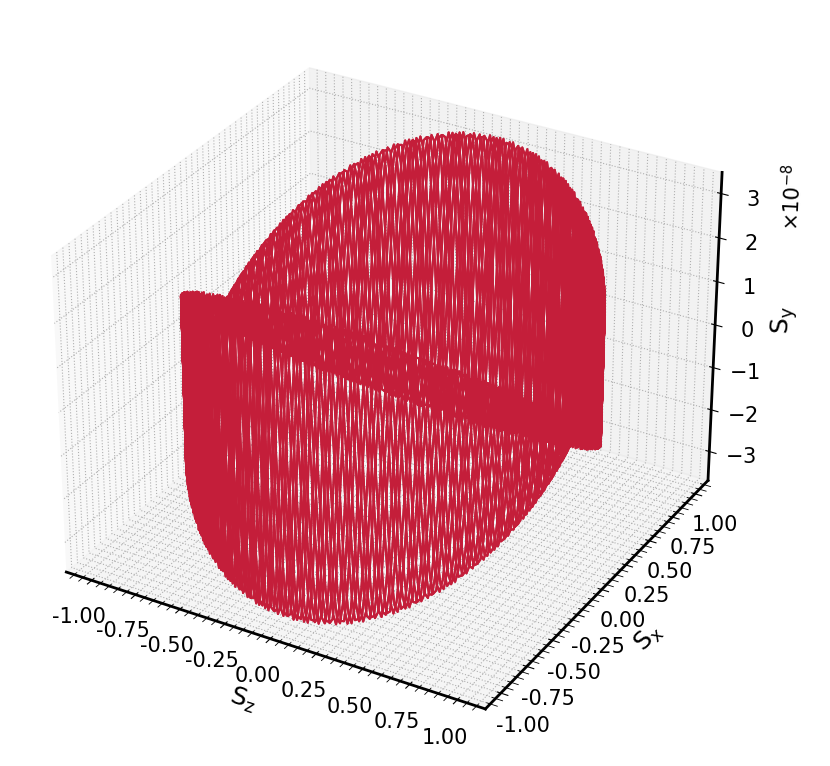

	Wrote ../img/small_edm_Bz_n1_1ppm/gr_1x2_wiggle_modulo.png


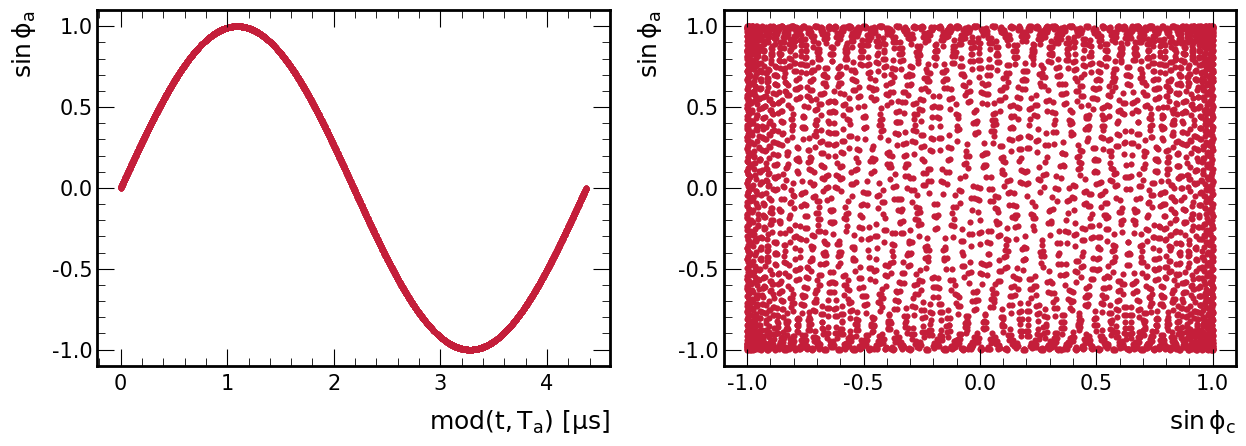

	Wrote ../img/small_edm_Bz_n1_1ppm/gr_sy_modulo.png


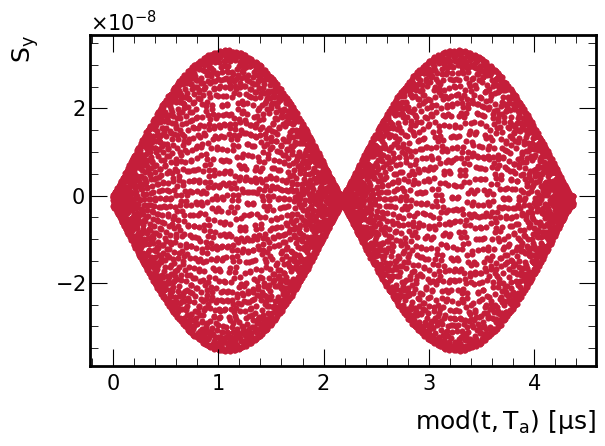

	Wrote ../img/small_edm_Bz_n1_1ppm/gr_3x2_spin_phase_summary.png


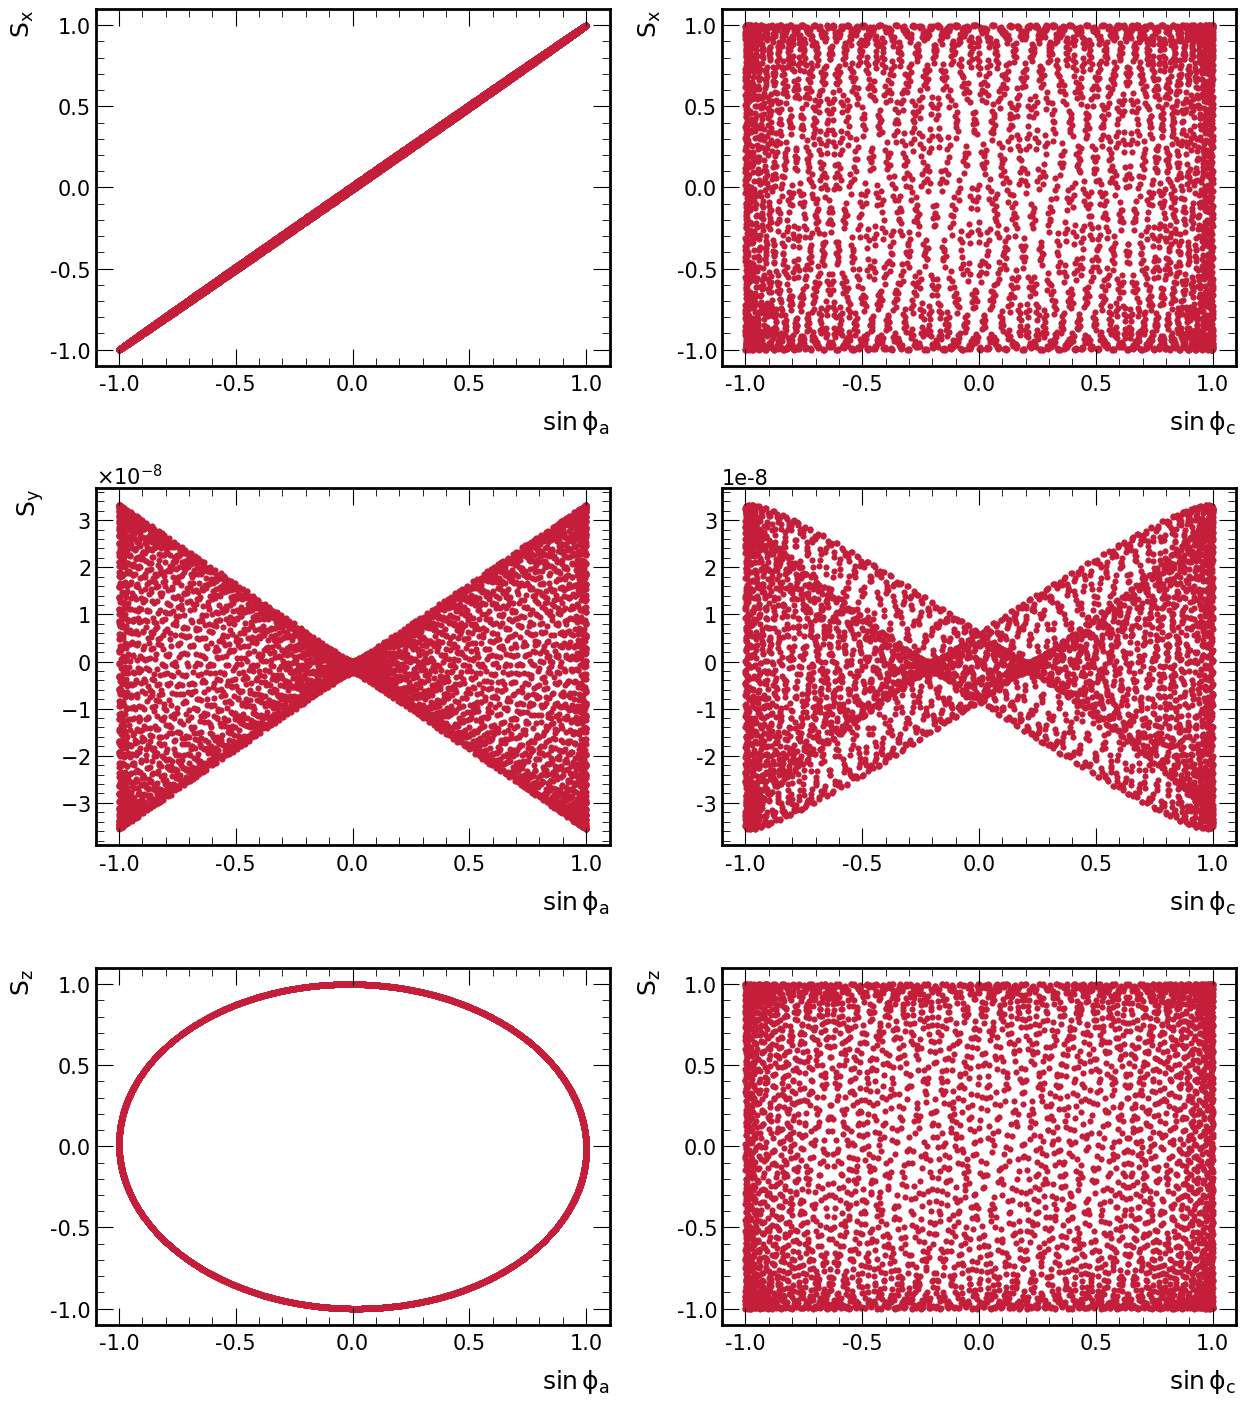

In [10]:

# Run the simulation
config = {
    'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': int(5e3),     # Number of time steps in the simulation
    'edm_mag': 0,           # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 1.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="small_edm_Bz_n1_1ppm"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')

In [11]:
print(f"omega_a = {simulation.omega_a * 1e-6} MHz")
print(f"omega_c = {simulation.omega_c * 1e-6 / simulation.muon.magic_gamma} MHz")

omega_a = 1.4380517058532218 MHz
omega_c = 1.4363770041495343 MHz
